# Prediction Using Decision Tree Algorithm

## Decision Tree Algorithm 
Decision Tree Algorithm is a popular and widely used algorithm in Machine Learning for classification and prediction tasks.

1-Build a Decision Tree classifier using libraries like scikit-learn in Python.

2-Visualize the Decision Tree graphically to understand its structure and decision-making process.

3-The primary purpose of creating this classifier is to be able to predict the right class for any new data points that are fed into it. This trained model can generalize patterns from the training data and apply them to classify new, unseen data.

## Importing libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn import metrics
%matplotlib inline

## Loading the Dataset

In [68]:
df=pd.read_csv("D:\Prediction using Decision Tree  Algorithm-ML-Project\Iris_data.csv")

In [69]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.shape

(150, 6)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [73]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [74]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [75]:
df=df.drop(['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Visualization

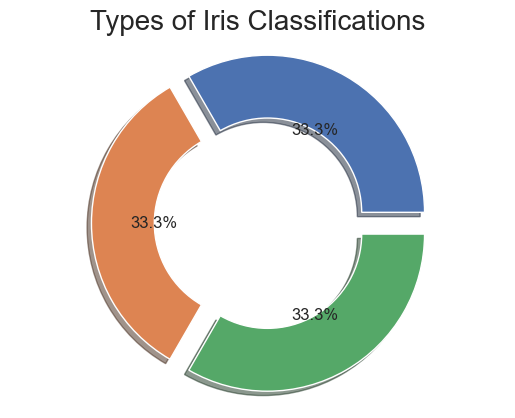

In [76]:
# Count the occurrences of each species in the 'Species' column
species_counts = df['Species'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Create a donut chart using pie chart and set the size of the hole
ax.pie(species_counts, autopct='%1.1f%%', shadow=True, explode=[0.08, 0.08, 0.08], wedgeprops=dict(width=0.4))

# Add a circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.2, color='white')
ax.add_artist(center_circle)

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
ax.axis('equal')

# Set the title
plt.title("Types of Iris Classifications", size=20)

# Display the donut chart
plt.show()


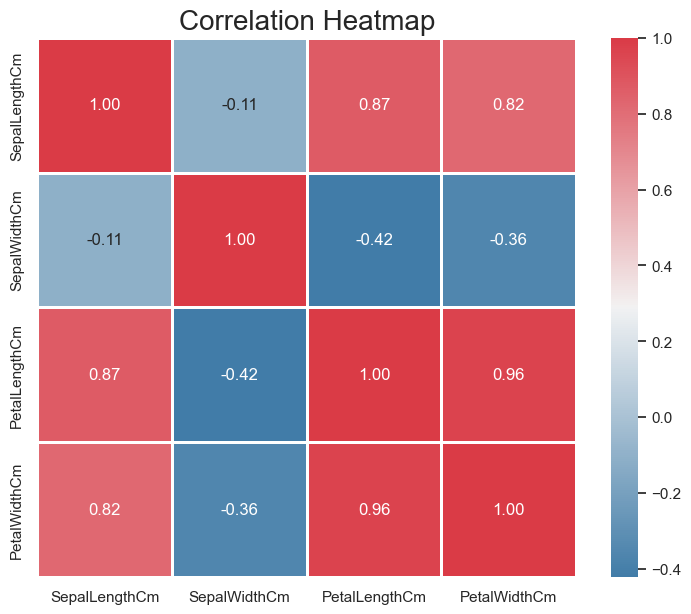

In [77]:
# Assuming 'df' is your DataFrame containing the data

# Create a figure and axes
plt.figure(figsize=(9, 7))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define a custom color map
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Plot the correlation heatmap with some customizations
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt='.2f', linewidths=1, linecolor='white', square=True)

# Set the title and font size
plt.title("Correlation Heatmap", size=20)

# Display the correlation heatmap
plt.show()


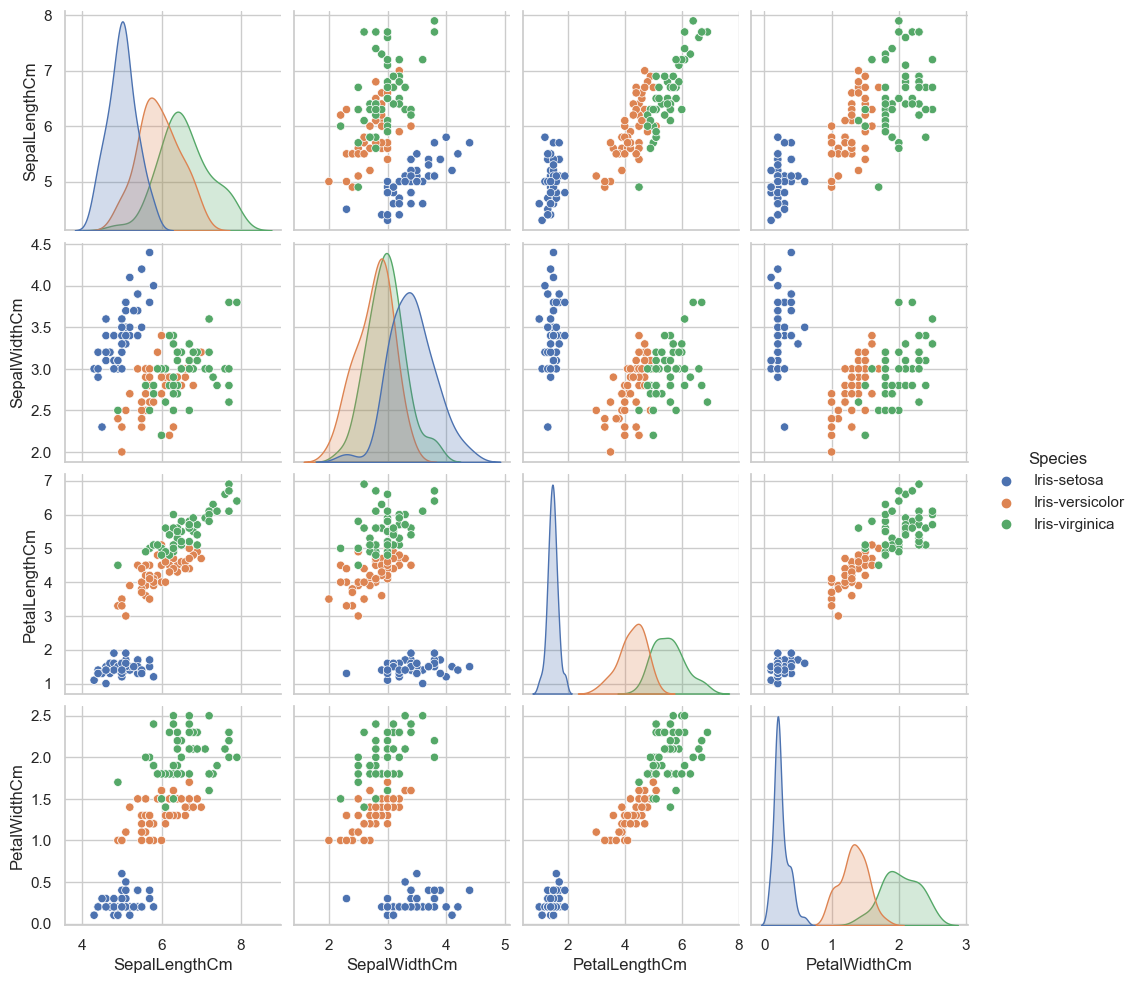

In [78]:
sns.pairplot(df, hue='Species')

**Observation:**
* Setosa has smaller petal lengths and width.
* Versicolor lies in the middle of the other two species in terms of petal length and width.
* Virginica has the largest of petal length and width.

## Checking Outliers

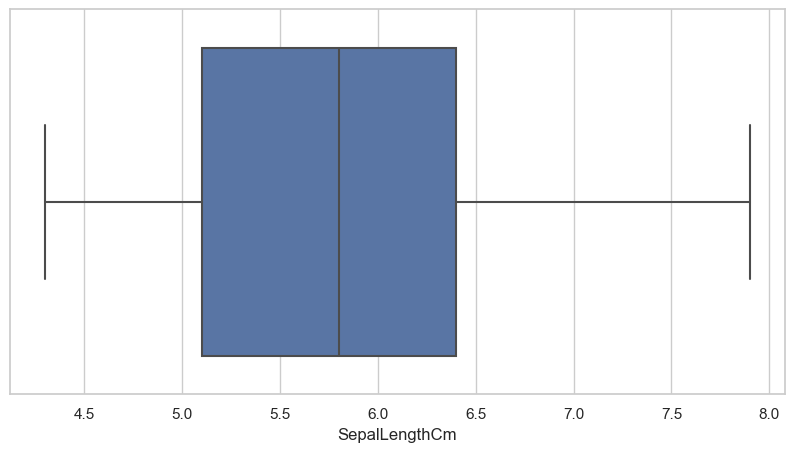

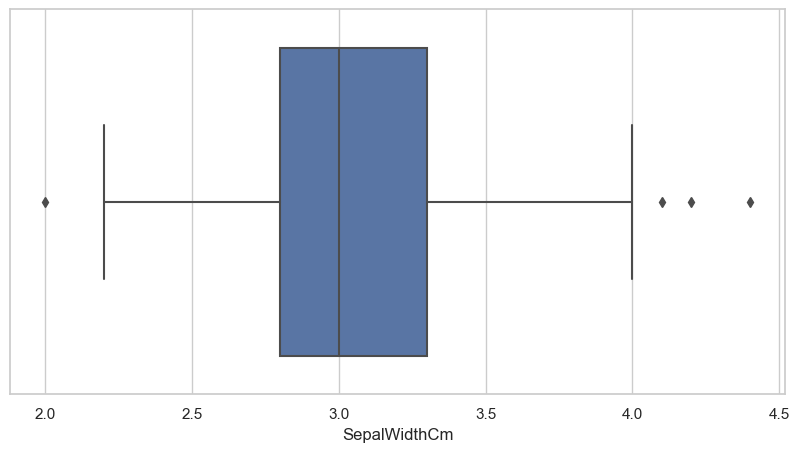

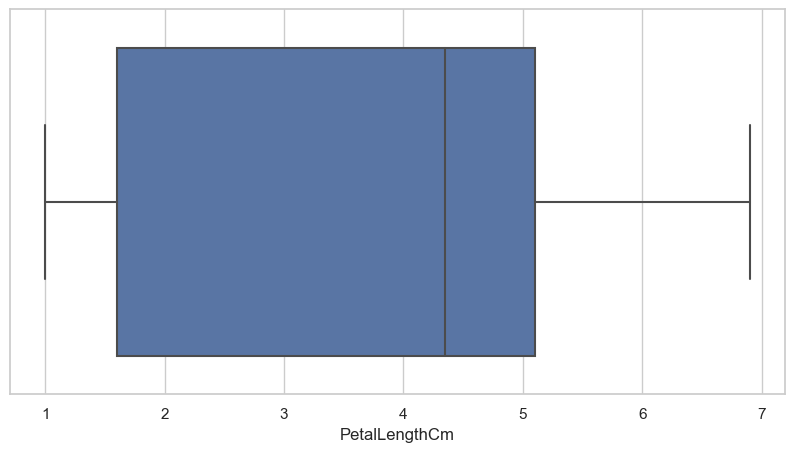

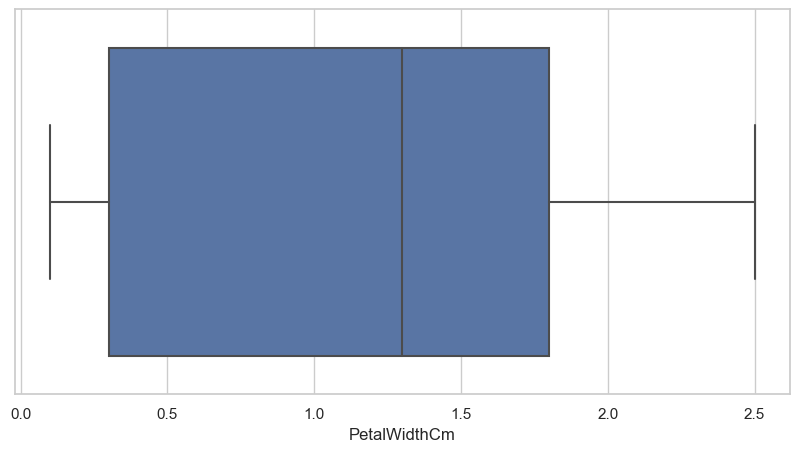

In [79]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column), data=df)

In [80]:
Q1=df['SepalWidthCm'].quantile(0.25)
Q3=df['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1
print ("IQR: ",IQR)
lower_limit=Q1-(1.5*IQR)
print("lower_limit: ",lower_limit)
upper_limit=Q3+(1.5*IQR)
print("upper_limit: ",upper_limit)
df['SepalWidthCm']=np.where(df['SepalWidthCm']<lower_limit,lower_limit,df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']>upper_limit,upper_limit,df['SepalWidthCm'])

IQR:  0.5
lower_limit:  2.05
upper_limit:  4.05


## Data Preprocessing

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
encoder_name_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
print(encoder_name_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [83]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Splitting the Datasset into Training and Testing

In [84]:
y= df['Species']
X= df.drop('Species', axis=1)

In [85]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,shuffle=True,random_state = 123)                                                                

In [86]:
X_train.shape

(120, 4)

In [87]:
y_train.shape

(120,)

## Model Training and Evaluation

In [88]:
Model=DecisionTreeClassifier()
Model.fit(X_train,y_train)
Model.score(X_test,y_test)*100

93.33333333333333

In [89]:
y_pred=Model.predict(X_test)

C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


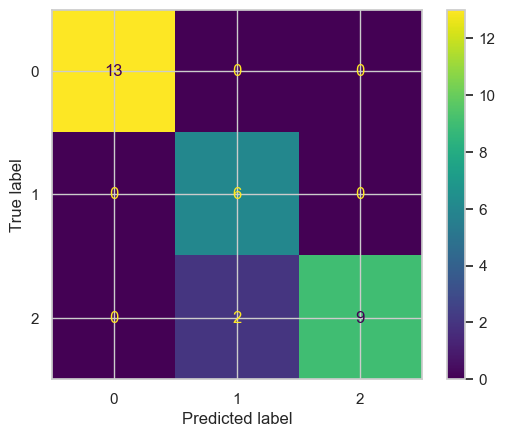

In [90]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(Model,X_test,y_test))

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



## Visualization

[Text(0.5416666666666666, 0.9285714285714286, 'Petal Length <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [37, 44, 39]\nclass = versicolor'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.625, 0.7857142857142857, 'Petal Width <= 1.75\ngini = 0.498\nsamples = 83\nvalue = [0, 44, 39]\nclass = versicolor'),
 Text(0.4166666666666667, 0.6428571428571429, 'Petal Length <= 5.35\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'Sepal Length <= 4.95\ngini = 0.085\nsamples = 45\nvalue = [0, 43, 2]\nclass = versicolor'),
 Text(0.16666666666666666, 0.35714285714285715, 'Sepal Width <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.

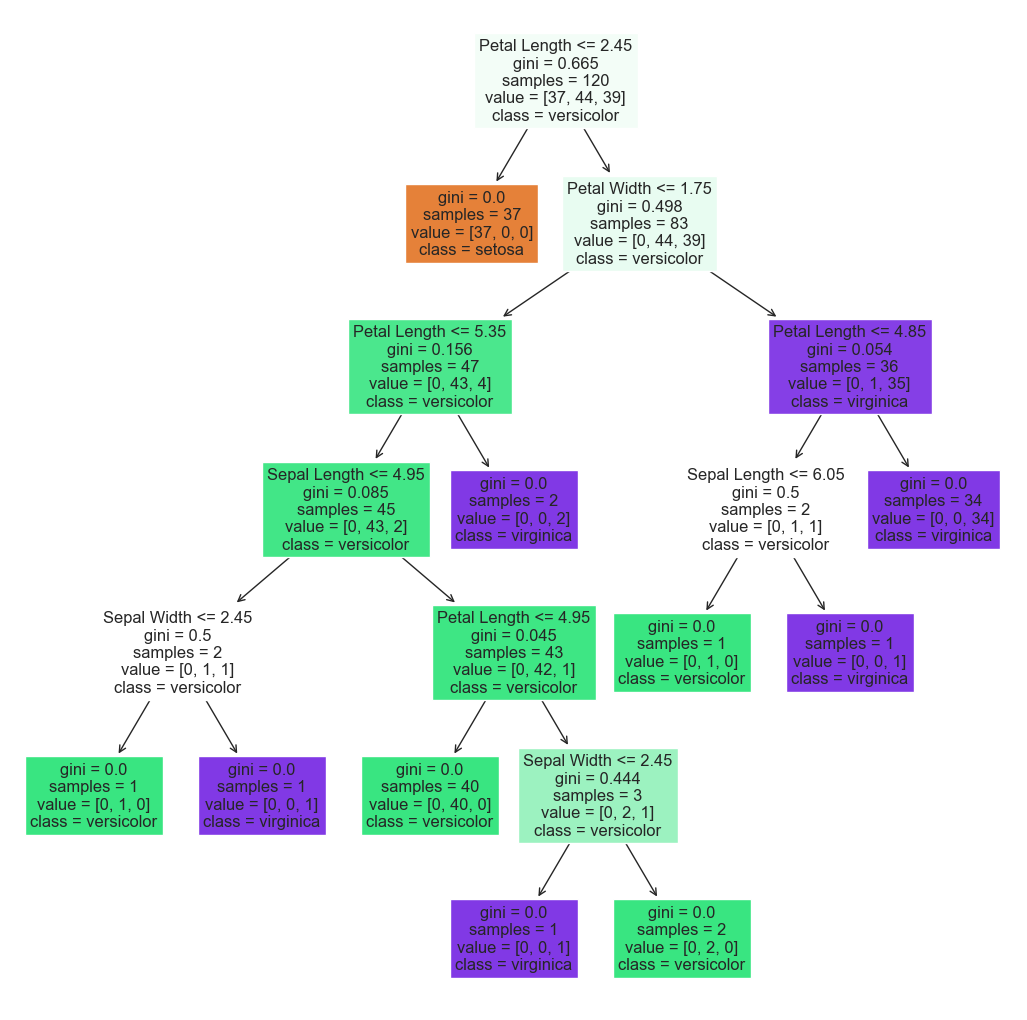

In [92]:
from sklearn import tree
features =['Sepal Length','Sepal Width','Petal Length','Petal Width']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(Model, feature_names = features, class_names = species, filled = True)

## Random Sample Prediction

In [93]:
prediction=Model.predict([[7.3,2.8,6.3, 1.8]])

if prediction==0:
    print('The given sample is Iris-setosa')
elif prediction==1:
    print('The given sample is Iris-versicolor')
else:
    print('The given sample is Iris-virginica')

The given sample is Iris-virginica


C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [94]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

prediction=Model.predict([[5, 3.6, 1.4 , 0.2]])
if prediction==0:
    print('The given sample is Iris-setosa')
elif prediction==1:
    print('The given sample is Iris-versicolor')
else:
    print('The given sample is Iris-virginica')

The given sample is Iris-setosa


C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
